In [ ]:
!mkdir /content/data
!unzip /content/drive/MyDrive/Kaggle/archive.zip -d /content

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

In [3]:
%cd COVID_CT

/content/COVID_CT


#데이터 읽기 및 폴더 나누기

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [5]:
infected_folder = 'Infected'
infected_images = load_images_from_folder(infected_folder)
n_infected_folder = 'Not_Infected'
n_infected_images = load_images_from_folder(n_infected_folder)

In [7]:
itr = round(501*0.7)
ival = round(550*0.1)
ite = round(501*0.2)

ntr = round(550*0.7)
nval = round(550*0.1)
nte = round(550*0.2)

In [8]:
covid_dir = 'Covid_CT'
os.mkdir(covid_dir)

In [9]:
# train, val, test folder
train_dir = './Covid_CT/train'
val_dir = './Covid_CT/val'
test_dir = './Covid_CT/test'

os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

# infected folder
in_train = './Covid_CT/train/infected'
in_val = './Covid_CT/val/infected'
in_test = './Covid_CT/test/infected'

os.mkdir(in_train)
os.mkdir(in_val)
os.mkdir(in_test)

#not infected folder
not_in_train = './Covid_CT/train/Not_infected'
not_in_val = './Covid_CT/val/Not_infected'
not_in_test = './Covid_CT/test/Not_infected'

os.mkdir(not_in_train)
os.mkdir(not_in_val)
os.mkdir(not_in_test)

In [10]:
def infected_images_to_folder(infected_images, train_dir, val_dir, test_dir):
    for i in range(len(infected_images)):
        img_name = "{}.jpg".format(i)
        if i in range(0, itr+1):
            cv2.imwrite(os.path.join(train_dir, img_name), infected_images[i])
        elif i in range(itr+1, itr+ival+1):
            cv2.imwrite(os.path.join(val_dir, img_name), infected_images[i])
        else:
            cv2.imwrite(os.path.join(test_dir, img_name), infected_images[i])

In [11]:
def not_infected_images_to_folder(n_intected_images, train_dir, val_dir, test_dir):
    for i in range(len(n_intected_images)):
        img_name = "{}.jpg".format(i)
        if i in range(0, ntr+1):
            cv2.imwrite(os.path.join(train_dir, img_name), n_intected_images[i])
        elif i in range(ntr+1, ntr+nval+1):
            cv2.imwrite(os.path.join(val_dir, img_name), n_intected_images[i])
        else:
            cv2.imwrite(os.path.join(test_dir, img_name), n_intected_images[i])

In [12]:
infected_images_to_folder(infected_images, './Covid_CT/train/infected', './Covid_CT/val/infected', './Covid_CT/test/infected')
not_infected_images_to_folder(n_intected_images, './Covid_CT/train/Not_infected', './Covid_CT/val/Not_infected', './Covid_CT/test/Not_infected')

In [17]:
# Train 랜덤 25개 출력
def plot_images_sample(X):
    plt.figure(figsize=(8,8))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        # plt.imshow(, cmap='Greys', interpolation='nearest') cmap=plt.cm.binary  # np.squeeze(X)
        plt.imshow(np.array(X[index]), cmap='Greys')
    plt.show()

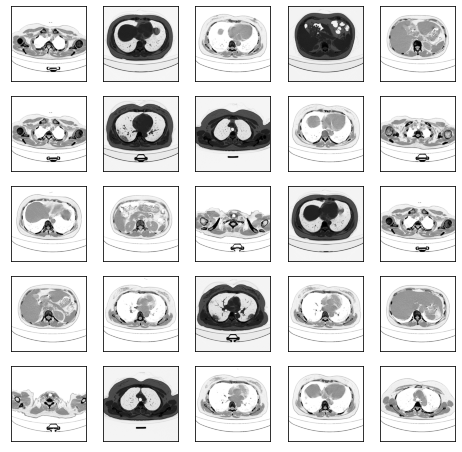

In [19]:
plot_images_sample(n_infected_images)

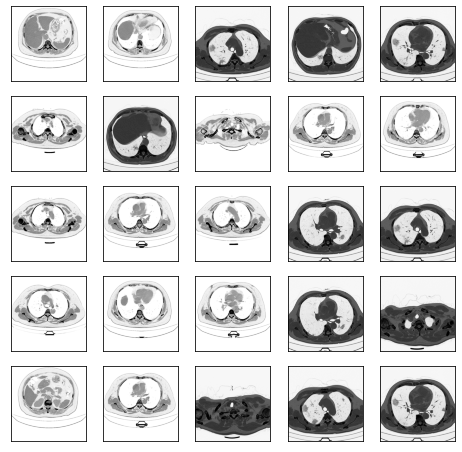

In [21]:
plot_images_sample(infected_images)

# 데이터 읽기

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

validation_generator = vali_datagen.flow_from_directory(
    val_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)


Found 738 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


# CNN0

In [22]:
IMAGE_ROWS = 256
IMAGE_COLS = 256
BATCH_SIZE = 30
IMAGE_SHAPE = (IMAGE_ROWS,IMAGE_COLS,1)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

model_CNN0 = models.Sequential()
model_CNN0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SHAPE))
model_CNN0.add(layers.MaxPool2D((2, 2)))
model_CNN0.add(layers.Flatten())
model_CNN0.add(layers.Dense(32, activation='relu'))
model_CNN0.add(layers.Dense(1, activation='sigmoid'))

model_CNN0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                16516128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 16,516,481
Trainable params: 16,516,481
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras import optimizers

model_CNN0.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [26]:
history = model_CNN0.fit_generator(train_generator, steps_per_epoch=1, epochs=10, validation_data = validation_generator, validation_steps = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 31s 31s/step - loss: 0.6932 - acc: 0.4333 - val_loss: 1.2650 - val_acc: 0.4333
Epoch 2/10
1/1 [==============================] - 0s 421ms/step - loss: 1.2177 - acc: 0.5000 - val_loss: 0.3697 - val_acc: 0.8333
Epoch 3/10
1/1 [==============================] - 0s 407ms/step - loss: 0.4830 - acc: 0.7000 - val_loss: 0.3284 - val_acc: 0.9000
Epoch 4/10
1/1 [==============================] - 0s 404ms/step - loss: 0.3113 - acc: 0.9333 - val_loss: 0.1858 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 418ms/step - loss: 0.1603 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 416ms/step - loss: 0.0890 - acc: 1.0000 - val_loss: 0.1923 - val_acc: 0.8667
Epoch 7/10
1/1 [==============================] - 0s 421ms/step - loss: 0.0934 - acc: 1.0000 - val_loss: 0.1803 - val_acc: 0.9000
Epoch 8/10
1/1 [==============================] - 0s 411ms/step - loss: 0.0536 - acc: 1.000

In [27]:
tr_score = model_CNN0.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Train Loss : 0.0246
Train Accuracy : 1.0000


In [29]:
te_score = model_CNN0.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

7/7 [==============================] - 1s 117ms/step - loss: 0.0287 - acc: 1.0000
Test Loss : 0.0287
Test Accuracy : 1.0000


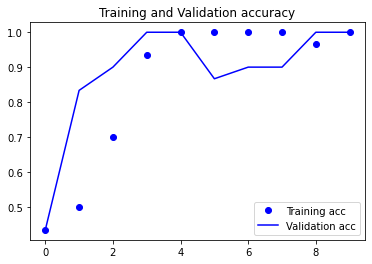

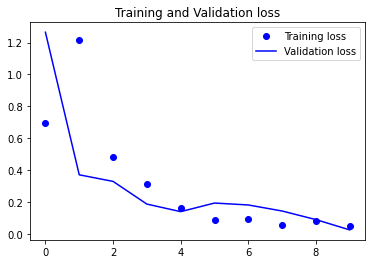

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# CNN1
+ 과적합

In [31]:
IMAGE_ROWS = 256
IMAGE_COLS = 256
BATCH_SIZE = 30
IMAGE_SHAPE = (IMAGE_ROWS, IMAGE_COLS, 1)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

model_CNN1 = models.Sequential()
model_CNN1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SHAPE))
model_CNN1.add(layers.MaxPool2D((2, 2)))
model_CNN1.add(layers.Conv2D(64, (3,3), activation='relu'))
model_CNN1.add(layers.MaxPool2D((2,2)))
model_CNN1.add(layers.Flatten())
model_CNN1.add(layers.Dropout(0.5))
model_CNN1.add(layers.Dense(128, activation='relu'))
model_CNN1.add(layers.Dense(1, activation='sigmoid'))

model_CNN1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dropout (Dropout)            (None, 246016)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [34]:
from tensorflow.keras import optimizers

model_CNN1.compile(optimizer=optimizers.Adam(learning_rate=1e-4), 
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [35]:
history = model_CNN1.fit_generator(train_generator, steps_per_epoch=1, epochs=15, validation_data=validation_generator, validation_steps=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.7044 - acc: 0.4333 - val_loss: 0.5628 - val_acc: 0.6333
Epoch 2/15
1/1 [==============================] - 0s 456ms/step - loss: 0.7023 - acc: 0.4667 - val_loss: 0.5391 - val_acc: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 443ms/step - loss: 0.5741 - acc: 0.6333 - val_loss: 0.2828 - val_acc: 0.9667
Epoch 4/15
1/1 [==============================] - 0s 461ms/step - loss: 0.3793 - acc: 0.8667 - val_loss: 0.3091 - val_acc: 0.8333
Epoch 5/15
1/1 [==============================] - 0s 456ms/step - loss: 0.2478 - acc: 0.8333 - val_loss: 0.4880 - val_acc: 0.6333
Epoch 6/15
1/1 [==============================] - 0s 458ms/step - loss: 0.2488 - acc: 0.8667 - val_loss: 0.2492 - val_acc: 0.9333
Epoch 7/15
1/1 [==============================] - 0s 459ms/step - loss: 0.1046 - acc: 1.0000 - val_loss: 0.1221 - val_acc: 1.0000
Epoch 8/15
1/1 [==============================] - 0s 456ms/step - loss: 0.1254 - acc: 0.9667 

In [38]:
tr_score = model_CNN1.evaluate_generator(train_generator)
print('Train Loss : {:.4f}' .format(tr_score[0]))
print('Train Accuracy : {:.4f}' .format(tr_score[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Train Loss : 0.0127
Train Accuracy : 1.0000


In [41]:
tr_score = model_CNN1.evaluate_generator(test_generator)
print('Test Loss : {:.4f}' .format(tr_score[0]))
print('Test Accuracy : {:.4f}' .format(tr_score[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Loss : 0.0153
Test Accuracy : 1.0000


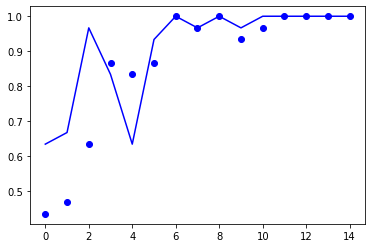

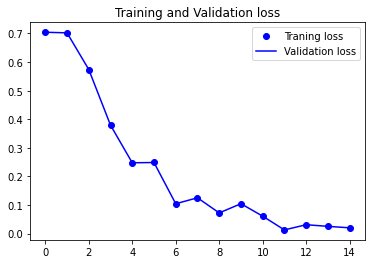

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Traning loss')
plt.plot(epochs, loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
history.history

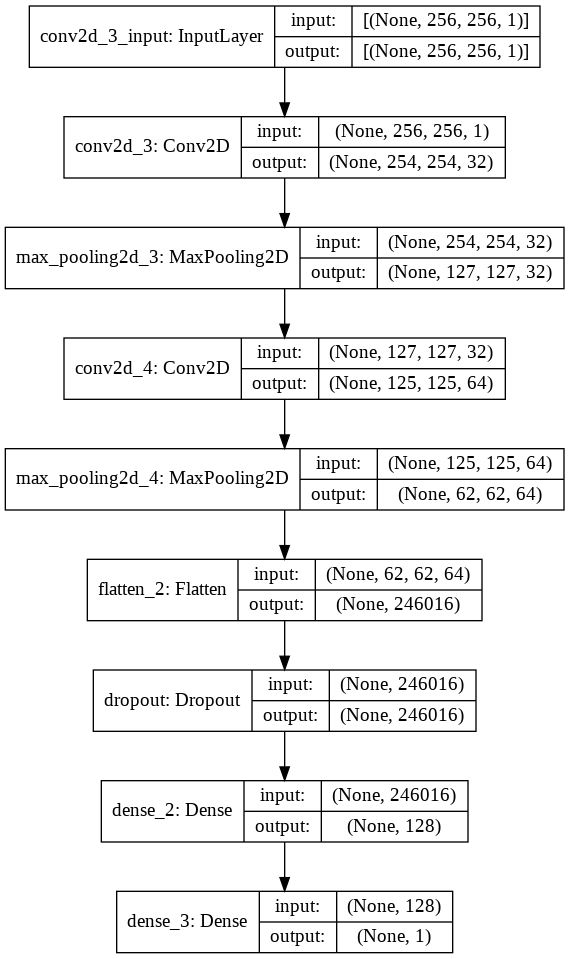

In [45]:
from tensorflow.keras.utils import plot_model

plot_model(model_CNN1, to_file='CNN1.png', show_shapes=True)

과적합을  피하고 적당히 복잡한 모델을 만들기 위한 방법
1. train 비율 ↓ test 비율 ↑
2. drop out 추가 및 마지막 dense node 수 줄이기
3. Augmentation 이용한 데이터 증가